# Querying with Spark
Since we have both SQL Server access as well as Spark installed on the Big Data Cluster nodes, we can also run Spark commands against files on the HDFS filesystem, or even against the SQL Master Instance

In [3]:
# Import the csv files from HDFS
df_airports = spark.read.format('csv').options(header='true', inferSchema='true').load('/Flight_Delays/airports.csv')
df_airlines = spark.read.format('csv').options(header='true', inferSchema='true').load('/Flight_Delays/airlines.csv')
df_flights = spark.read.format('csv').options(header='true', inferSchema='true').load('/Flight_Delays/flights.csv')

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1569853543014_0006,pyspark,idle,Link,Link,✔


SparkSession available as 'spark'.


In [4]:
# Let's take a look at some of the dataframe's content
df_airports.show(10)

In [6]:
# Let's join some data here as well
from pyspark.sql.functions import *

# We will join both dataframes again but this time drop the AIRLINE column of the df_flights dataframe
df_flightinfo = df_flights.join(df_airlines, df_flights.AIRLINE == df_airlines.IATA_CODE, how="inner").drop(df_flights.AIRLINE)

# Select a number of columns from the joined dataframe
df_flightinfo.select("FLIGHT_NUMBER", "AIRLINE", "SCHEDULED_TIME", "ELAPSED_TIME").show()

In [7]:
# We are not limited to the PySpark command however. Spark allows us to write our trusted SQL as well!
# To do this we have to register the df_flightinfo dataframe as a (temporary) table so we can run SQL queries against it
df_flightinfo.registerTempTable("FlightInfoTable")


In [8]:
# Select some rows useing a SQL statement
sqlContext.sql("SELECT FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, ELAPSED_TIME FROM FlightInfoTable").show(10)

In [9]:
# Some more advanced SQL use:
# Group the flight distance for each airline and return the average flight distance for each flight
sqlContext.sql("SELECT AIRLINE, AVG(DISTANCE) FROM FlightInfoTable GROUP BY AIRLINE ORDER BY 'avg(Distance)' DESC").show()

In [13]:
# Your Data Engineers and Scientists want to get something from the master instance?
# No problemo! Just read a table into a dataframe!
df_sqldb_sales = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlserver://master-0.master-svc;databaseName=AdventureWorks") \
    .option("dbtable", "Sales.SalesOrderDetail") \
    .option("user", "[your username]") \
    .option("password", "[your password]").load()

In [14]:
df_sqldb_sales.show(10)

In [4]:
%matplotlib inline 

# We can do more cool stuff, like plotting
# if the command fails, install matplotlib through Manage Packages
import matplotlib

# We are using pandas to display graphs, pandas has some built-in graph functions
# Also we require to have our dataframe in-memory of the Spark master we are running
# this code on
import pandas as pd

# Create a local pandas dataframe from a csv through an URL
pd_dataframe = pd.read_csv("https://raw.githubusercontent.com/Evdlaar/Presentations/master/(2019)%20Data%20Saturday%20-%20Utrecht/Demo%20Files/automobiles.csv")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117686f98>]],
      dtype=object)

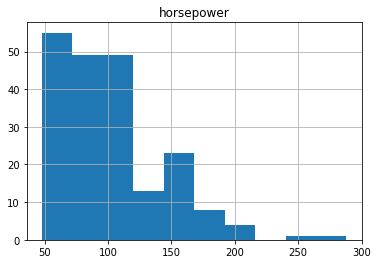

In [5]:
%matplotlib inline 

# The first line above is very important
# If we do not include it the graphs are not shown inside the notebook
# and various errors will be returned

# We can create a histogram, for instance for the horsepower column
pd_dataframe.hist("horsepower")